# Modelos de difusão

In [1]:
import networkx as nx
import numpy  as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from copy import deepcopy

## Modelo SIR

No modelo **SIR**, os nós podem se encontrar em três estados: suscetíveis($S$), infectados($I$) ou removidos($R$).

Os estados $S$ e $I$ são definidos como no modelo **SI**, e o estado $R$ é atingido após um nó passar pelo estado infectado e se tornar imune a doença.

No modelo **SIR**, existe o parâmetro de contágio $\beta$, e o parâmetro $\gamma$ associado a velocidade com que um indivíduo se recupera da doença.

Em um modelo de tempo discreto, $\gamma$ representa a probabilidade de um indivíduo se recuperar a cada instante de tempo, tendo o tempo de infecção uma distribuição geométrica.

Em um modelo contínuo, o tempo que um indivíduo permanece infectado segue uma distribuição exponencial com parâmetro $\gamma$.

### Exemplo

A simulação do modelo **SIR** em tempo discreto é similar à do modelo **SI**, porém com mais um estado. 

No código a seguir é apresentado este tipo de simulação, usando três valores de $\gamma$ e um para $\beta$.

In [2]:
# recebe: rede 
# retorna: numero de infectados
def numinf(G):
    num = 0
    for n in G.nodes:
        if G.nodes[n]['estado'] == 1:
            num += 1

    return num

In [3]:
# recebe: rede 
# retorna: numero de vizinho infectados 
def numinfviz(G,n):
    num = 0
    for m in nx.neighbors(G,n):
        if G.nodes[m]['estado'] == 1:
            num += 1
    
    return num

In [4]:
# reecebe: rede, beta, gamma, M, v.a.
# retona: fracao de infectados
def sir(G,beta,gamma,M,rng):
    
    delta = [0]*(M+1)
    delta[0] = numinf(G)/G.order()

    for k in range(M):
        for n in G.nodes:
            if G.nodes[n]['estado'] == 0: # o vértice é suscetível?
                p = (1-(1-beta)**numinfviz(G,n)) # probabilidade de contágio
                if rng.random() < p: # o vértice contagia-se?
                    G.nodes[n]['estado-prox'] =  1
                else:
                    G.nodes[n]['estado-prox'] =  0
            elif G.nodes[n]['estado'] == 1: # vértice infectado
                if rng.random() < gamma:
                    G.nodes[n]['estado-prox'] =  2
                else:
                    G.nodes[n]['estado-prox'] =  1

        num = 0
        for n in G.nodes:
            #um vétice em estado 2 (R), fica no estado 2
            if (G.nodes[n]['estado'] == 0) or (G.nodes[n]['estado'] == 1):
                G.nodes[n]['estado'] = G.nodes[n]['estado-prox']
            if G.nodes[n]['estado'] == 1:
                num += 1
                
        delta[k+1] = num/G.order()
        
    return delta


In [5]:
# inicializa a rede
def init(G,p,rng):
    for n in G.nodes:
        G.nodes[n]['estado-prox'] = 0
        if rng.random() < p:
            G.nodes[n]['estado'] = 1 #I = 1
        else:
            G.nodes[n]['estado'] = 0 #S = 0

In [6]:
# redes barabasi_albert_graph
n = 100

m = 3 # 3 ligacoes
G3 = nx.barabasi_albert_graph(n,m)

m = 10 # 10 ligacoes
G10 = nx.barabasi_albert_graph(n,m)

m = 1 # 1 ligacao
G1 = nx.barabasi_albert_graph(n,m)

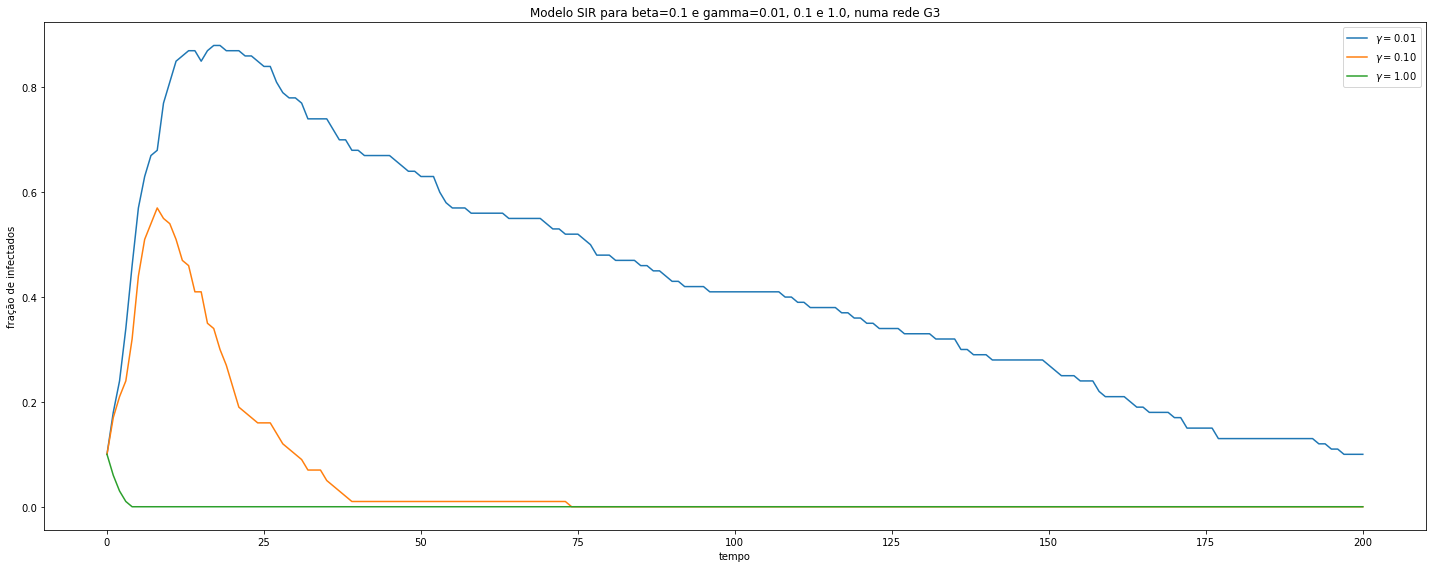

In [8]:
# Para os três valores de $\gamma$, a fração de vértices infectados tende a zero porque os nós recuperam-se. 
# Para o tempo de infecção para valores de $\gamma$ maiores, observa-se que o número de infectados atinge um máximo.

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos vértices estão inicialmente infectados
prob = 0.1
init(G3,prob,rng)

G = deepcopy(G3)
beta = 0.1
gamma = 0.01
M = 200
dens1 = sir(G,beta,gamma,M,rng)

G = deepcopy(G3)
beta = 0.1
gamma = 0.1
M = 200
dens2 = sir(G,beta,gamma,M,rng)

G = deepcopy(G3)
beta = 0.1
gamma = 1.0
M = 200 
dens3 = sir(G,beta,gamma,M,rng)

fig = plt.subplots(1,1,figsize=(20,8))
plt.plot(dens1,label=r'$\gamma = 0.01$')
plt.plot(dens2,label=r'$\gamma = 0.10$')
plt.plot(dens3,label=r'$\gamma = 1.00$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SIR para beta=0.1 e gamma=0.01, 0.1 e 1.0, numa rede G3')

plt.tight_layout()
plt.show()

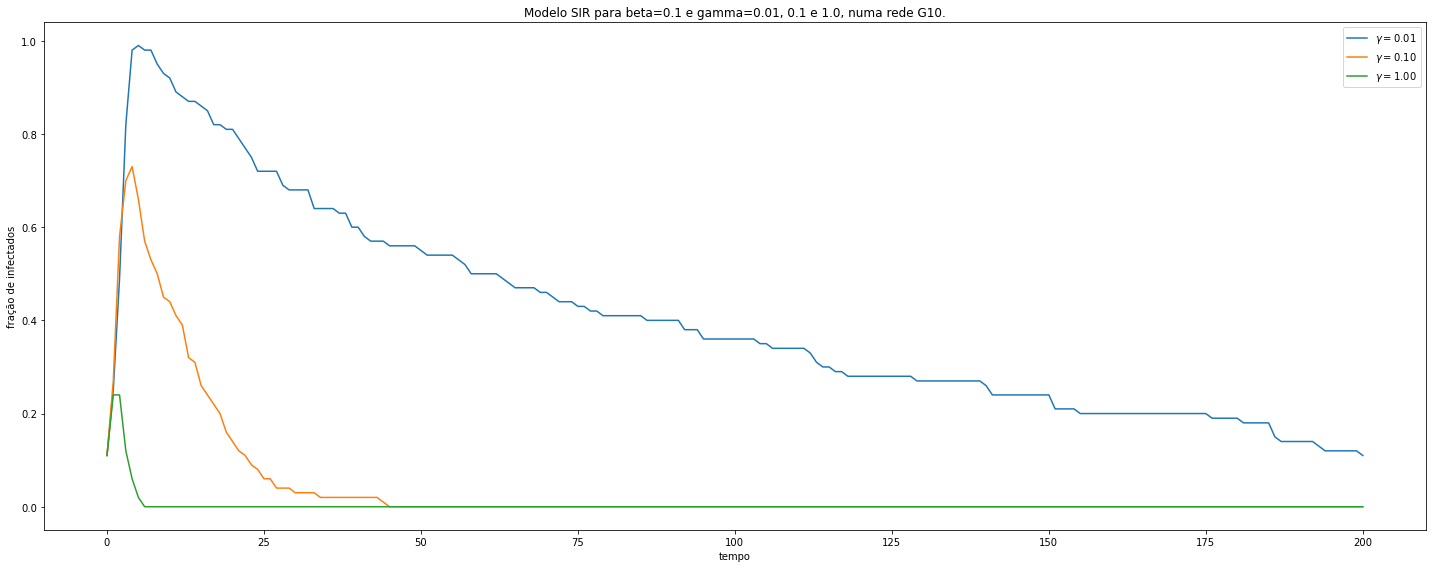

In [9]:
# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos vértices estão inicialmente infectados
init(G10,0.1,rng)

G = deepcopy(G10)
beta = 0.1
gamma = 0.01
M = 200
dens1 = sir(G,beta,gamma,M,rng)

G = deepcopy(G10)
beta = 0.1
gamma = 0.1
M = 200
dens2 = sir(G,beta,gamma,M,rng)

G = deepcopy(G10)
beta = 0.1
gamma = 1.0
M = 200 
dens3 = sir(G,beta,gamma,M,rng)

fig = plt.subplots(1,1,figsize=(20,8))
plt.plot(dens1,label=r'$\gamma = 0.01$')
plt.plot(dens2,label=r'$\gamma = 0.10$')
plt.plot(dens3,label=r'$\gamma = 1.00$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SIR para beta=0.1 e gamma=0.01, 0.1 e 1.0, numa rede G10.')

plt.tight_layout()
plt.show()

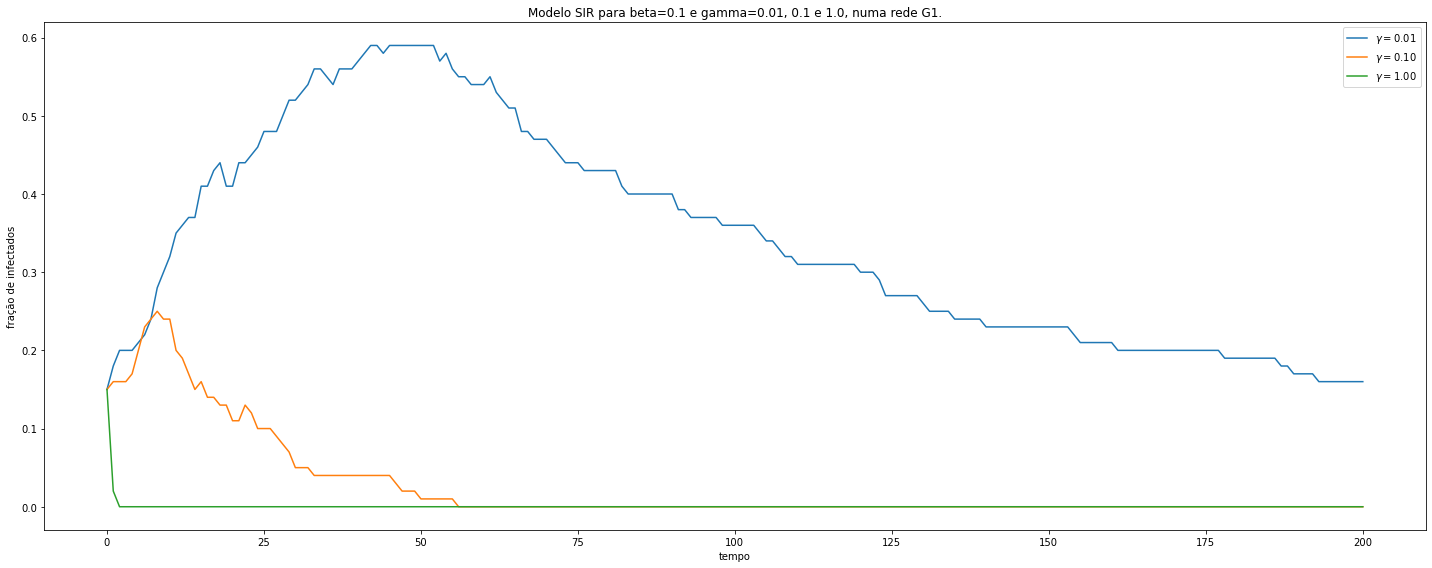

In [10]:
# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos vértices estão inicialmente infectados
init(G1,0.1,rng)

G = deepcopy(G1)
beta = 0.1
gamma = 0.01
M = 200
dens1 = sir(G,beta,gamma,M,rng)

G = deepcopy(G1)
beta = 0.1
gamma = 0.1
M = 200
dens2 = sir(G,beta,gamma,M,rng)

G = deepcopy(G1)
beta = 0.1
gamma = 1.0
M = 200 
dens3 = sir(G,beta,gamma,M,rng)

fig = plt.subplots(1,1,figsize=(20,8))
plt.plot(dens1,label=r'$\gamma = 0.01$')
plt.plot(dens2,label=r'$\gamma = 0.10$')
plt.plot(dens3,label=r'$\gamma = 1.00$')

plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SIR para beta=0.1 e gamma=0.01, 0.1 e 1.0, numa rede G1.')

plt.tight_layout()
plt.show()

O número máximo de vértices infectados depende do valor de $q$, como o seguinte código mostra

In [12]:
# fração de vértices infectados em tempo M=200

q = np.linspace(1/11,0.5,10)
#q = np.linspace(1/11,1,21)
den = np.zeros_like(q)

print(q)

for k in range(q.shape[0]):
    for i in range(100): # 100 simulacoes
        g = nx.barabasi_albert_graph(100,3)
        init(g,0.1,rng)
        
        dens = sir(g,0.1,(1-q[k])/q[k]*0.1,200,rng)
        den[k] += np.max(dens)
    print(k,den[k])

0.1
0 10.089999999999996
1 11.04
2 14.899999999999997
3 20.089999999999996
4 25.309999999999995
5 30.44999999999999
6 36.25
7 41.75000000000002
8 46.58
9 51.500000000000014


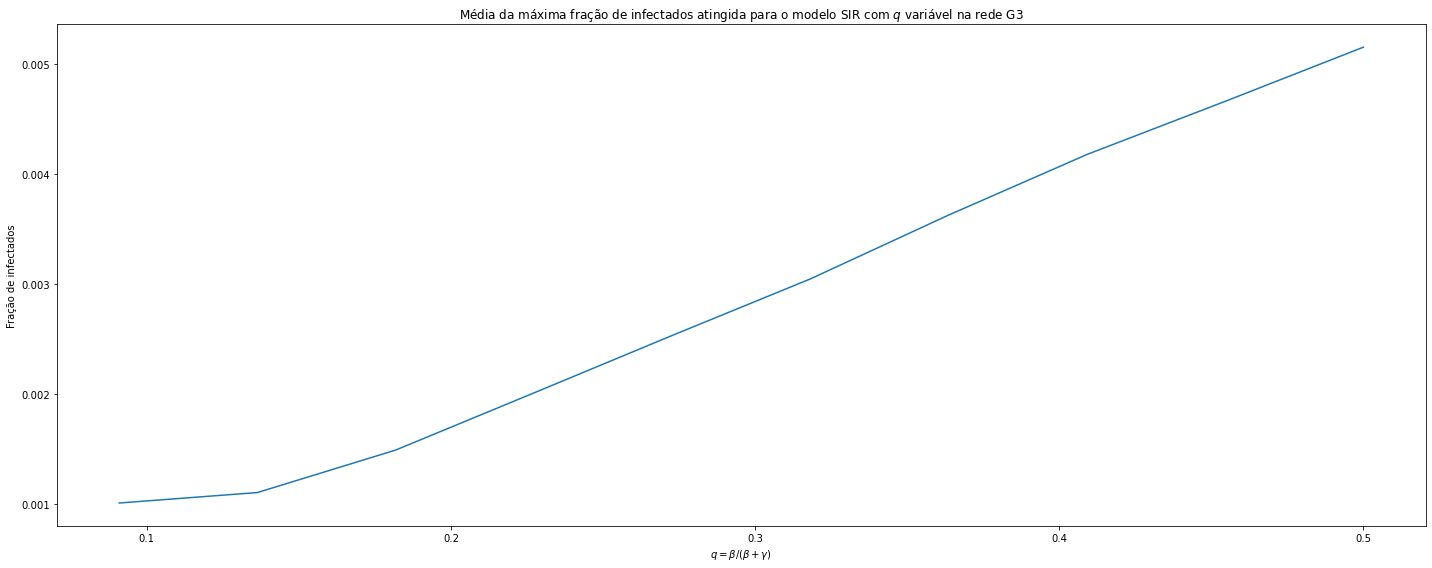

In [14]:
# média(100 simulações) da fração de infectados máxima atingida para cada valor de q.

den = den/100

fig = plt.subplots(1,1,figsize=(20,8))

plt.plot(q,den)
plt.ylabel('Fração de infectados')
plt.xlabel(r'$q = \beta/(\beta+\gamma)$')
plt.title('Média da máxima fração de infectados atingida para o modelo SIR com $q$ variável na rede G3')

plt.tight_layout()
plt.show()

### Exemplo

Para o modelo **SI**, apresentamos duas maneiras de frear o espalhamento da infecção, a remoção de arestas e a remoção de vértices. 

Para o modelo **SIR**, há uma terceira maneira, que no caso de uma doença seria equivalente à vacinação, iniciar com alguns vértices no estado $R$. 

O código a seguir avalia a influência da fração de vértices inicialmente no estado $R$. 

Os vértices vacinados são escolhidos de duas maneiras, ao acaso e começando com os vértices de maior grau. 

Observe-se que a vacinação é anterior à infecção. 

In [17]:
# incia rede com recuperados e sucetiveis baseado em probabilidade
# recebe: rede, probabilidade, v.a.
def initr(G,p,rng):
    for n in G.nodes:
        if rng.random() < p:
            G.nodes[n]['estado'] = 2 # R = 2
            G.nodes[n]['estado-prox'] = 2
        else:
            G.nodes[n]['estado'] = 0 # S = 0
            G.nodes[n]['estado-prox'] = 0

In [18]:
# inicia rede com recuperados baseado em v.a. 
# recebe: rede, X, probabilidade, v.a.
def initrl(G,gr,p,rng):
    nx.set_node_attributes(G, 0, name='estado')
    nx.set_node_attributes(G, 0, name='estado-prox')

    K = rng.binomial(G.order(),p) # extrae amostras de uma distribuição binomial baseada em grau e probabilidade
    k = 0
    for n in gr:
        if k < K:
            G.nodes[n]['estado'] = 2 #R = 2
            G.nodes[n]['estado-prox'] = 2
            k += 1
        else:
            break

In [19]:
# inicializa infectados, recuperado e sucetiveis baseado em probabilidade
# recebe: rede, probabilidade, v.a.
def initi(G,p,rng):
    for n in G.nodes:
        # um vértice no estado R não pode-se infectar
        if G.nodes[n]['estado'] == 2:
            continue
        if rng.random() < p:
            G.nodes[n]['estado'] = 1 #I = 1
            G.nodes[n]['estado-prox'] = 1
        else:
            G.nodes[n]['estado'] = 0 #S = 0
            G.nodes[n]['estado-prox'] = 0

In [21]:
p = np.linspace(0,0.5,10)
den1 = np.zeros_like(p)
den2 = np.zeros_like(p)

for k in range(p.shape[0]):
    print(p[k])
    for i in range(100): # 100 simulacoes
        
        G3 = nx.barabasi_albert_graph(100,3) # rede

        G = deepcopy(G3) 

        initr(G3,p[k],rng) # rede com recuperados
        initi(G3,0.1,rng) # 10% infectados
        
        dens = sir(G3,0.1,0.01,200,rng) # fracao retornada por SIR a nova rede
        den1[k] += np.max(dens) 
        
        G3 = deepcopy(G)
        cen = dict(G3.degree)
        gr = dict(sorted(cen.items(), key=lambda item: item[1], reverse=True))
        
        initrl(G3,gr,p[k],rng) # incializa recuperados
        initi(G3,0.1,rng) # inicializa infectados

        dens = sir(G3,0.1,0.01,200,rng) # fracao de infectado por SIR a nova rede
        den2[k] += np.max(dens)
                
    print(k,den1[k],den2[k])

0.0
0 89.63000000000002 89.71999999999998
0.05555555555555555
1 84.05 79.86000000000001
0.1111111111111111
2 77.49000000000001 65.60000000000004
0.16666666666666666
3 73.03000000000002 54.15
0.2222222222222222
4 66.86000000000001 40.61999999999999
0.2777777777777778
5 60.660000000000025 26.210000000000008
0.3333333333333333
6 54.29000000000001 17.710000000000004
0.38888888888888884
7 49.19999999999999 11.09
0.4444444444444444
8 43.30999999999999 8.129999999999997
0.5
9 38.18999999999999 6.539999999999996


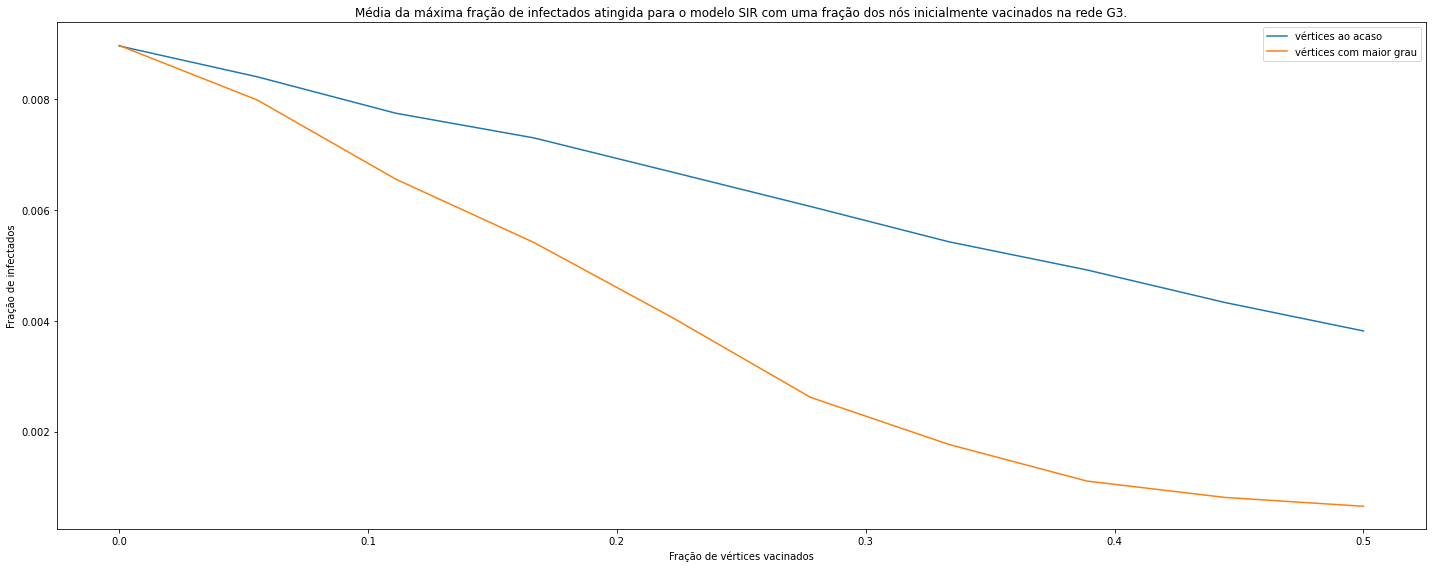

In [23]:
# conclusaõ: escolher os vértices prestando atenção aos graus produz melhores resultados, isto é, um menor número de nós infectados.

den1 = den1/100
den2 = den2/100

fig = plt.subplots(1,1,figsize=(20,8))

plt.plot(p,den1, label='vértices ao acaso')
plt.plot(p,den2, label='vértices com maior grau')

plt.legend()
plt.xlabel('Fração de vértices vacinados')
plt.ylabel('Fração de infectados')
plt.title('Média da máxima fração de infectados atingida para o modelo SIR com uma fração dos nós inicialmente vacinados na rede G3.')

plt.tight_layout()
plt.show()